# CПОЙЛЕР

Всё, написанное ниже, базируется на зубодробительной механике и решении диффура, полученного из модели обратного маятника с перемещающимся подвесом.

Вид функции $\phi$ был заранее задан, после вычислено уравнение для xb, а после оно численно решалось. Далее, используя полученные данные, обратно находилось $\phi$. Сравнение полученного значения с истинным приведено на последнем графике.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Итак, решаем сначала уравнения для подвеса (base)

In [43]:
def base_calc(LHS, t, g, l, m, phi0):
    xb, yb = LHS
    dxb_dt = yb
    dyb_dt = (yb * np.sin(phi0 * np.exp(-t)) * (1 + phi0 * np.exp(-t)) -
              m * l * phi0 * np.exp(-t) - m * g * np.sin(phi0 * np.exp(-t))) / np.cos(phi0 * np.exp(-t))
    return [dxb_dt, dyb_dt]

In [103]:
n = 5000
tmax = 5

g = 9.8
l = 1
m = 1
phi0 = np.pi / 6
t = np.linspace(0, tmax, n)
initial_cond = [0, 0]

In [104]:
sol = scipy.integrate.odeint(base_calc, initial_cond, t, args=(g, l, m, phi0))

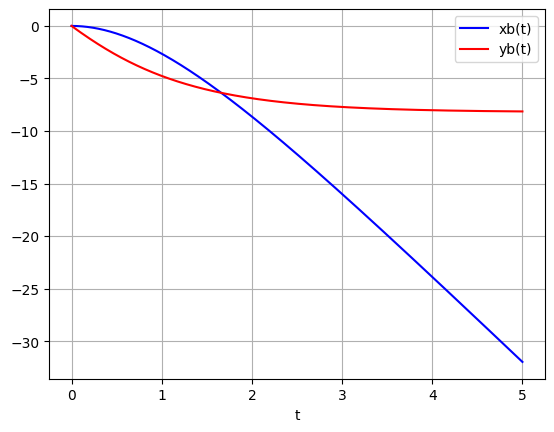

In [105]:
plt.plot(t, sol[:, 0], 'b', label='xb(t)')
plt.plot(t, sol[:, 1], 'r', label='yb(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Теперь возвращаемся к рассмотрению грузика (pend)

In [107]:
xb = sol[:, 0]

In [108]:
def pend_calc(LHS, t, g, l, m, xb):
    global tmax
    global n
    phi, theta = LHS
    dxb_dt = (xb[min(n - 1, int(n * t / tmax + 1))] - xb[max(0, int(n * t / tmax - 1))]) / (2 * tmax / n)
    ddxb_dtt = (xb[min(n - 1, int(n * t / tmax + 1))] - 2 * xb[min(n - 1, int(n * t / tmax))] + xb[max(0, int(n * t / tmax - 1))]) / (tmax ** 2 / n ** 2)

    dphi_dt = theta
    dtheta_dt = (-dxb_dt * theta * np.sin(phi) + dxb_dt * l * np.sin(phi) - ddxb_dtt * l * np.cos(phi) - m * g * l * np.sin(phi)) / (m * l ** 2)
    return [dphi_dt, dtheta_dt]

In [109]:
initial_cond = [phi0, -phi0]
sol2 = scipy.integrate.odeint(pend_calc, initial_cond, t, args=(g, l, m, xb))

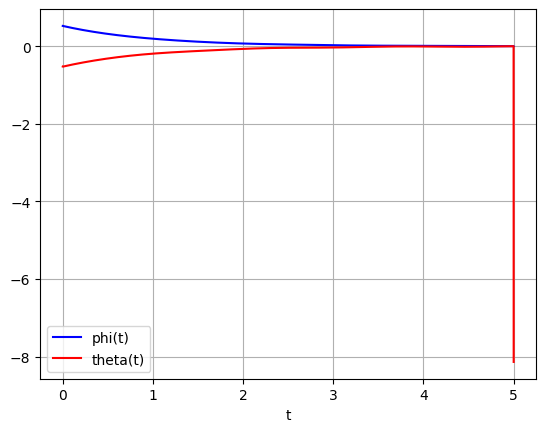

In [110]:
plt.plot(t, sol2[:, 0], 'b', label='phi(t)')
plt.plot(t, sol2[:, 1], 'r', label='theta(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

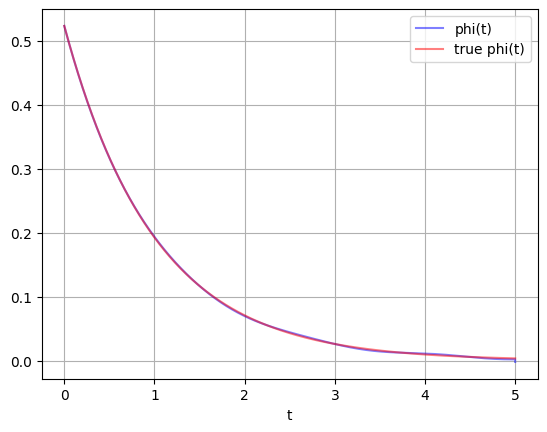

In [111]:
plt.plot(t, sol2[:, 0], 'b', alpha=0.5, label='phi(t)')
plt.plot(t, phi0 * np.exp(-t), 'r', alpha=0.5, label='true phi(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Исходя из сравнения, можно сказать, что был получен достаточно точный результат для модели